## <b>Tasks</b>

- Formulate a particular question that might be interesting to answer by exploring this dataset.

- Calculate statistics for the numerical and categorical attributes.

- Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions (in a markdown cell).

- Generate two plots with the combined distribution of attributes and draw conclusions from them (in a markdown cell).
Make sure your conclusions are related to the question you have formulated.

- Make sure your conclusions are related to the question you have formulated.

In [19]:
import pandas as pd
from matplotlib import pyplot as plt


In [20]:
df = pd.read_csv('../bank.csv')


## <b>Dataset</b>

We are using a [Bank Marketing Dataset](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#)  from UCI which contains numerical and categorical statistics for customers to analyze the likelihood of them subscribing to a term deposit. You can see what type of data it contains below:

In [21]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In the below code we run `df.describe()` This shows us the summary statistics for numerical attributes. This shows us the count of valid rows, average value, standard deviation, minimum value, 1st quartile, median, 3rd quartile, maximum value of each column.

Some key information we find
  - The highest balance we have found is 81204, this means we have no customers data above this threshold. 
  - The average age to be around 42
  - The average balance is 1413

In [22]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


Now we will run `df.describe(include=['object'])` to generate the summary statistics for the categorical attributes. This shows the count of valid rows, the number of different categories, the most frequent category, how many times the most frequent category appears.

Some key information we find:
- There is 11 unique jobs in our data
- The most common relationship status is married at 1111 people
- The most common education level is secondary at 995 people
- The most common job is management

In [23]:
df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
count,1990,2000,1896,2000,2000,2000,1809,2000,1546,2000
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,no,no,cellular,feb,failure,no
freq,461,1111,995,1985,1037,1750,1663,404,955,1000


## <b>Research Question</b>

**How does balance vary across different ages and marital statuses, and how does this affect the likelihood of subscribing to a term deposit?**

First lets plot our balance range in a histogram. We then will plot the balance across age and martial status. This will give us insight into our question we formulated.

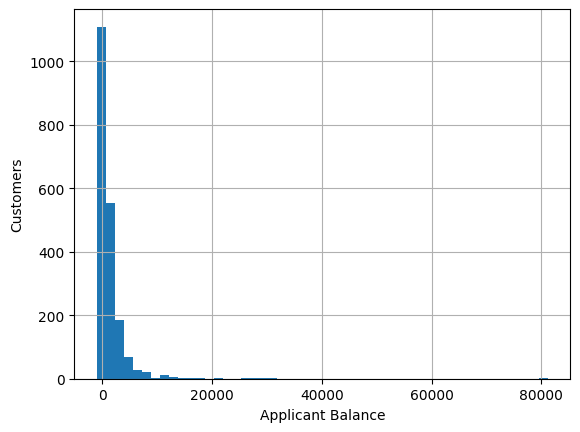

In [29]:
df['balance'].hist(bins=50)
plt.xlabel('Applicant Balance')
plt.ylabel('Customers')
plt.show()

### Scatter Plot between age and balance
Below we have generated a scatter plot between age and balance, from this we find that:

- People between 30 and 40 tend to have higher balances
- We have a few high balance outliers past the age of 30

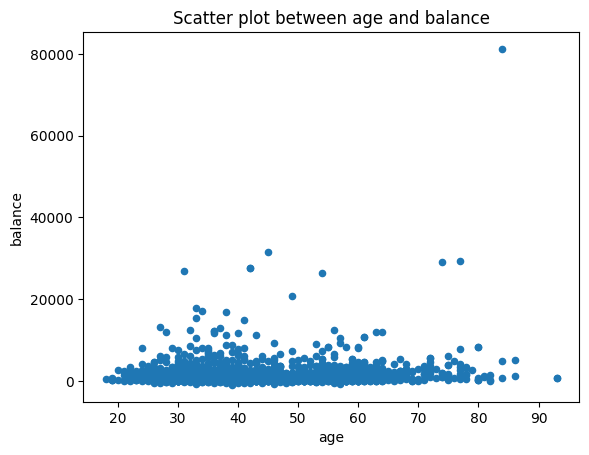

In [24]:
df.plot.scatter(x='age', y='balance')
plt.title('Scatter plot between age and balance')
plt.show()

### Box plot of balance grouped by martial statuses
Below we have generated a box plot of balance grouped by martial statuses, this shows us that:
 - Married people have the most customers with high balances
 - Single people fall shortly behind.
  - Divorced customers have a noticeably smaller balances on average


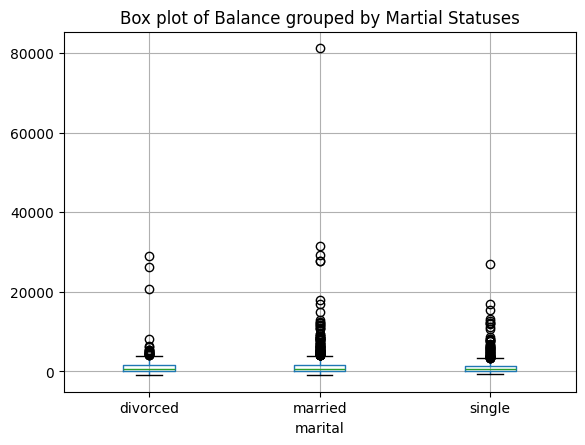

In [25]:
df.boxplot(column='balance', by='marital')
plt.title('Box plot of Balance grouped by Martial Statuses')
plt.suptitle("") 
plt.show()

### Conclusion
- Middle-aged people (30-40 years old) tend to have higher balances.
- Married people generally have higher balances than single or divorced people.

### Histogram to show age distribution by martial status
We will now analyze how **marital status varies across different age groups** to understand these patterns further. From the plot we find out that:

- Most customers in our highest income range found before (30-40) are married.


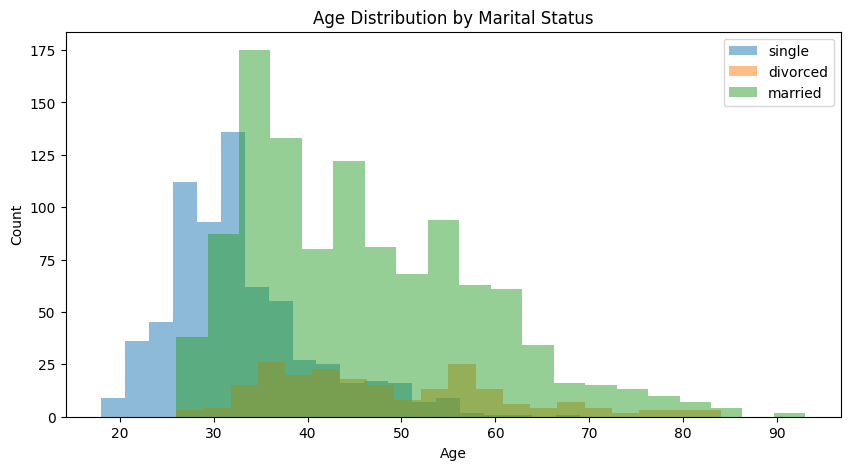

In [26]:
plt.figure(figsize=(10,5))
for status in df['marital'].unique():
    plt.hist(df[df['marital'] == status]['age'], bins=20, alpha=0.5, label=status)

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Marital Status")
plt.legend()
plt.show()



### Subscription rate for martial statuses
Now finally we can check the ratio at which each martial status is subscribed via a frequency table as seen below. From this we find that:
- The majority of married people are unsubscribed
- The majority of single people are subscribed

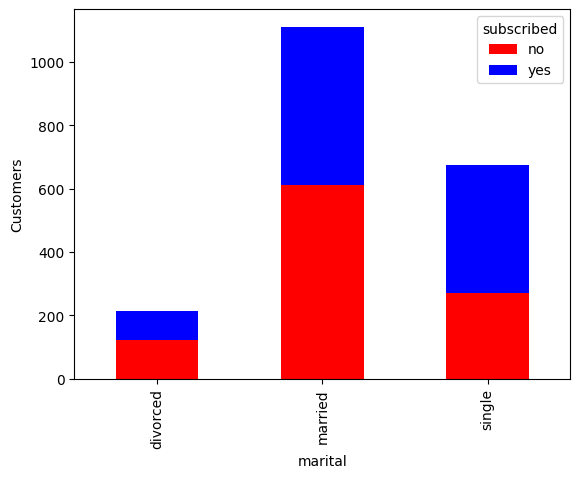

In [30]:
crosstab = pd.crosstab(df['marital'], df['subscribed'])
crosstab.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Customers')
plt.show()

## Conclusion
From our analysis we find that even though married people tend to have higher balances, they are not more likely to subscribe to the term deposit, this could be due to them having more financial commitments that they cannot invest in a term deposit. We find that single people who have similar but slightly smaller balances to married people are much more likely to invest in a term deposit.